##### Librerias

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Realizar los distintos test
# ------------------------------------------------------------------------------

import scipy.stats as stats
from scipy.stats import ttest_ind, norm, chi2_contingency, f_oneway
from sklearn.linear_model import LinearRegression

# Imputación de nulos 

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")


pd.set_option('display.max_columns', None) #  poder visualizar todas las columnas de los DataFrames

pd.set_option('display.float_format', '{:.2f}'.format) # convierte los float en otro formato con dos decimales.

#### Fase 1: Exploración y Limpieza

##### Exploración Inicial

In [2]:
# Lectura del CSV y visualización de las 5 primeras filas. 
df_flight = pd.read_csv("./datos/customer_flight_activity.csv", index_col = 0)
df_flight.head()

,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,
100018,2017,1,3,0,3,1521,152.00,0,0
100102,2017,1,10,4,14,2030,203.00,0,0
100140,2017,1,6,0,6,1200,120.00,0,0
100214,2017,1,0,0,0,0,0.00,0,0
100272,2017,1,0,0,0,0,0.00,0,0


In [3]:
# Lectura del CSV y visualización de las 5 primeras filas. 
df_loyalty = pd.read_csv("./datos/customer_loyalty_history.csv", index_col = 0)
df_loyalty.head()

,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
Loyalty Number,,,,,,,,,,,,,,,
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.00,Married,Star,3839.14,Standard,2016,2,NaN,NaN
549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.00,1.00
608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.00,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [4]:
# Ver filas y columnas 
df_flight.shape

(405624, 9)

In [5]:
df_flight.duplicated().sum()

228705

In [6]:
df_loyalty.shape

(16737, 15)

In [7]:
df_loyalty.duplicated().sum()

0

In [8]:
# Unimos los dos archivos csv, con método merge. Tienen en común el índice. On indica nombre del índice e inner intersecciona.

df_total = pd.merge(df_loyalty, df_flight, on="Loyalty Number", how="inner")
df_total.head()

,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,,,
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.00,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,1,0,0,0,0,0.00,0,0
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.00,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,2,3,0,3,2823,282.00,0,0
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.00,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,3,0,0,0,0,0.00,0,0
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.00,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,4,0,0,0,0,0.00,0,0
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.00,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2018,10,6,2,8,3352,335.00,465,38


In [9]:
# Analizamos los duplicados que tenemos en el dataframe. 

df_total.duplicated().sum()

1864

In [10]:
# Convertimos el indice Loyalty Number en una columna en nuestro dataframe. 

df_total.reset_index(inplace=True)

In [11]:
df_total.head(2)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.00,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,1,0,0,0,0,0.00,0,0
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.00,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,2,3,0,3,2823,282.00,0,0


In [12]:
# Creamos función exploratoria para ver todos los datos del dataframe en general y por columna.
# Veremos información general del df y más detalladamente para cada columna como : valores únicos , recuento de valores, % de nulos y resultados estadisticos. 

def explore_data(df):
    
    # Info general
    print("Shape del dataframe:")
    print(df.shape)
    print("\nInformación del dataframe:")
    print(df.info())
    print("\nNombres de las columnas:")
    print(df.columns)
    
    # Duplicados
    print("\nDuplicados:")
    print(df[df.duplicated()])
    
    # Exploración de cada columna
    for columna in df.columns:
        print(f"\nColumna: {columna}")
        print("\nValores únicos:")
        print(df[columna].unique())
        print("\nConteo de valores:")
        print(df[columna].value_counts())
        print("\nPorcentaje de nulos:")
        print(df[columna].isnull().mean() * 100)
        print("\nDescripción:")
        print(df[columna].describe())


explore_data(df_total)

Shape del dataframe:
(405624, 25)

Información del dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Country                      405624 non-null  object 
 2   Province                     405624 non-null  object 
 3   City                         405624 non-null  object 
 4   Postal Code                  405624 non-null  object 
 5   Gender                       405624 non-null  object 
 6   Education                    405624 non-null  object 
 7   Salary                       302952 non-null  float64
 8   Marital Status               405624 non-null  object 
 9   Loyalty Card                 405624 non-null  object 
 10  CLV                          405624 non-null  float64
 11  Enrollment Type              405624 non-null  object 
 

In [13]:
# Resumen nulos
df_nulos = pd.DataFrame((df_total.isnull().sum() / df_total.shape[0]) * 100, columns = ["%_nulos"])
df_nulos[df_nulos["%_nulos"] > 0]

,%_nulos
Salary,25.31
Cancellation Year,87.66
Cancellation Month,87.66


##### Conclusiones tras la exploración inicial: 

-   Columnas : eliminaremos los espacios en blanco reemplazandolos por un guión bajo y pondremos el nombre en minúsculas. 
-   Nulos : nos encontramos 3 columnas con % de nulos para analizar. Salary (25.31%), Cancellation Year y Cancelation Month (87.66%).
-   Duplicados : tenemos 1864 duplicados en nuestro dataframe mergeado. 
-   Salary : tiene valores negativos , además de los nulos. 
-   Unificar en 2 columnas : Enrollment Year	, Enrollment Month	,Cancellation Year y Cancellation Month.

##### Limpieza de datos

In [14]:
# Como hemos visto en la exploración teniamos 1864 duplicados. Procedemos a eliminarlos para no tener información adicional irrelevante. 

df_total2 = df_total.drop_duplicates()
df_total2.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.00,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,1,0,0,0,0,0.00,0,0
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.00,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,2,3,0,3,2823,282.00,0,0
2,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.00,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,3,0,0,0,0,0.00,0,0
3,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.00,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,4,0,0,0,0,0.00,0,0
4,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.00,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2018,10,6,2,8,3352,335.00,465,38


In [15]:
# Función limpiar columnas, espacios y a minusculas. 
def cleaning_columns(df):

    new_columns = [col.lower().replace(" ", "_") for col in df.columns]
    df.columns = new_columns
    return df

In [16]:
# Aplicamos la función a nuestro df.
df_total2 = cleaning_columns(df_total2)

In [17]:
# Ver columnas tras el cambio.
df_total2.columns

Index(['loyalty_number', 'country', 'province', 'city', 'postal_code',
       'gender', 'education', 'salary', 'marital_status', 'loyalty_card',
       'clv', 'enrollment_type', 'enrollment_year', 'enrollment_month',
       'cancellation_year', 'cancellation_month', 'year', 'month',
       'flights_booked', 'flights_with_companions', 'total_flights',
       'distance', 'points_accumulated', 'points_redeemed',
       'dollar_cost_points_redeemed'],
      dtype='object')

###### Fechas

In [18]:
# De la columna mes, reemplazaremos por el nombre en vez de dejarlo numérico, para una posterior visualización correcta.
meses = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

df_total2["month"] = df_total2["month"].apply(lambda x: meses[x])

In [19]:
# Dado que el porcentaje de nulos en ambas es bastante alto pero no sabemos si es que no contestaron nunca los clientes y pueden seguir estando en la cia, los pondremos como desconocido.
cancellation_nan = ["cancellation_year", "cancellation_month"]

for columna in cancellation_nan:
    df_total2[columna].fillna("unkwown", inplace=True)

In [20]:
#Vamos a juntar las columnas , para dejar dos con los datos de fecha y año, y eliminaremos las que contienen la info separada.

def column_union(column1, column2):

    column1 = column1.astype(str)
    column2 = column2.astype(str)

    return column1 + '-' + column2


In [21]:
df_total2["enrollement_date"] = column_union(df_total2["enrollment_year"], df_total2["enrollment_month"])

In [22]:
df_total2["cancellation_date"] = column_union(df_total2["cancellation_year"], df_total2["cancellation_month"])

In [23]:
# Eliminaremos las 4 columnas que ahora ya tenemos unificadas.
# Creamos una funcion para ello:

def remove_columns(df,column):
    return df.drop(columns=column)

list_to_remove = ["enrollment_year","enrollment_month","cancellation_year","cancellation_month"]
df_total2 = remove_columns(df_total2,list_to_remove)


In [24]:
df_total2.head(2)

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,enrollement_date,cancellation_date
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.00,Married,Star,3839.14,Standard,2017,January,0,0,0,0,0.00,0,0,2016-2,unkwown-unkwown
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.00,Married,Star,3839.14,Standard,2017,February,3,0,3,2823,282.00,0,0,2016-2,unkwown-unkwown


###### Salary

In [25]:
# Ver % nulos salary y valorar cambios.

df_total2.isnull().sum()[df_total2.isnull().sum() > 0] / df_total2.shape[0]

salary   0.25
dtype: float64

In [26]:
df_total2["salary"].unique()

array([ 83236.,     nan, 103495., ...,  76178.,  91970., -57297.])

In [27]:
# Valores negativos en Salary , pasados a positivos con el abs().

df_total2["salary"]= df_total2["salary"].abs()


In [28]:
df_total2["salary"].unique()

array([ 83236.,     nan, 103495., ...,  76178.,  91970.,  57297.])

In [29]:
# Nulos Salary - 25% 

# Iterative : info de columnas presentes, se considera que si existe un porcentaje mayor a 5% y 10% de valores nulos entre una gran cantidad de datos, la estimación de dichos datos mediante la media o la mediana no es muy precisa.

imputer_iterative = IterativeImputer(max_iter = 20, random_state = 42)

# ajustamos y tranformamos los datos
imputer_iterative_imputado = imputer_iterative.fit_transform(df_total2[["salary"]])

imputer_iterative_imputado



array([[83236.],
       [83236.],
       [83236.],
       ...,
       [75049.],
       [75049.],
       [75049.]])

In [30]:
df_total2[["salary"]] = imputer_iterative_imputado

In [31]:
df_total2.describe()[["salary"]]

,salary
count,403760.00
mean,79371.73
std,30008.34
min,9081.00
25%,63901.00
50%,79371.73
75%,82940.00
max,407228.00


#### Fase 2: Visualización


In [32]:
# 1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

monthly_data_flights = df_total2.groupby(["year", "month"])["flights_booked"].sum().reset_index(name="flights_booked")
monthly_data_flights.head(10)

,year,month,flights_booked
0,2017,April,55720
1,2017,August,78692
2,2017,December,77650
3,2017,February,47691
4,2017,January,47766
5,2017,July,89288
6,2017,June,80493
7,2017,March,64271
8,2017,May,65279
9,2017,November,56905


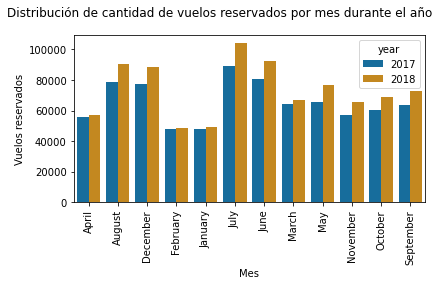

In [33]:
# Elegimos barplot para ver la distribucion entre una variable categorica y numerica. 

sns.barplot(x = "month", 
            y = "flights_booked", 
            data = monthly_data_flights, 
            hue = "year", 
            palette = "colorblind")


plt.suptitle("Distribución de cantidad de vuelos reservados por mes durante el año")
plt.xlabel("Mes")
plt.ylabel("Vuelos reservados")
plt.xticks(rotation = 90)
plt.tight_layout()

In [34]:
# 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes? distance - points_accumulated

corr = df_total2["distance"].corr(df_total2["points_accumulated"])
print(corr)

# Coeficiente de correlación es cercano a 1, la relación es positiva. Mientras una variable aumenta, la otra también tiende a aumentar. 

0.9945458005650185


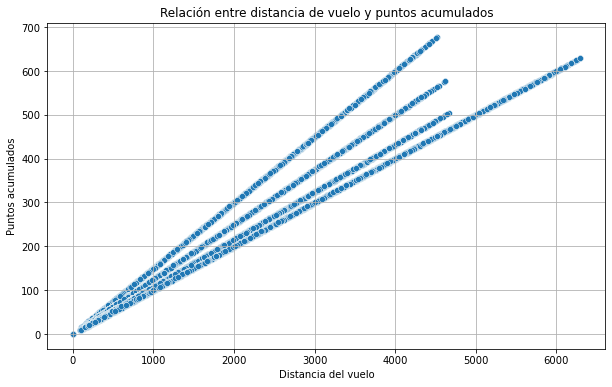

In [35]:
#Scatterplot : relación entre dos variables numericas.

plt.figure(figsize=(10, 6))
sns.scatterplot(x="distance", y="points_accumulated", data=df_total2)
plt.title("Relación entre distancia de vuelo y puntos acumulados")
plt.xlabel("Distancia del vuelo")
plt.ylabel("Puntos acumulados")
plt.grid(True)
plt.show()

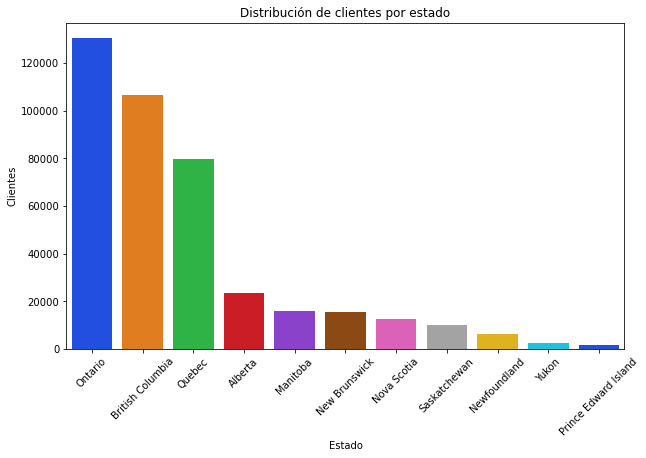

In [36]:
# 3. ¿Cuál es la distribución de los clientes por provincia o estado? province 

customers_province = df_total2["province"].value_counts().reset_index()

customers_province.columns = ["province","customers"]

plt.figure(figsize=(10, 6))
sns.barplot(data=customers_province, x="province", y="customers", palette="bright")
plt.title("Distribución de clientes por estado")
plt.xlabel("Estado")
plt.ylabel("Clientes")
plt.xticks(rotation=45)  
plt.show()

In [37]:
customers_province = customers_province.sort_values(by="customers",ascending= False)
customers_province.head()

,province,customers
0,Ontario,130258
1,British Columbia,106442
2,Quebec,79573
3,Alberta,23360
4,Manitoba,15900


In [38]:
#4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?  education- salary 

mean_salary_edu = df_total2.groupby("education")["salary"].mean().reset_index()
mean_salary_edu

,education,salary
0,Bachelor,72599.08
1,College,79371.73
2,Doctor,178403.68
3,High School or Below,61146.38
4,Master,103734.52


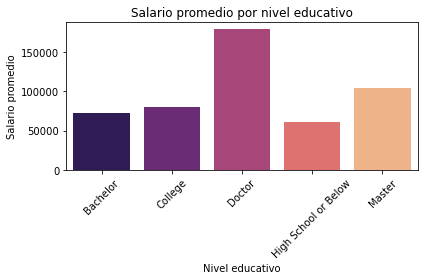

In [39]:
sns.barplot(x = "education", 
            y = "salary", 
            data = mean_salary_edu,
            palette = "magma")

plt.title("Salario promedio por nivel educativo")
plt.xlabel("Nivel educativo")
plt.ylabel("Salario promedio")
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

In [40]:
# # El 100% de los datos de salary para el nivel educativo college , son nulos. 
# null_salary_count = college_df['salary'].isnull().sum()
# null_salary_count

In [41]:
# sns.barplot(x = "education", 
#             y = "salary", 
#             data = df_join,
#             palette = "magma")

# plt.title('Salario promedio por nivel educativo')
# plt.xlabel('Nivel educativo')
# plt.ylabel('Salario promedio')
# plt.xticks(rotation=45)  
# plt.tight_layout()
# plt.show()

In [42]:
# 5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?  loyalty_card

proporcion = df_total2["loyalty_card"].value_counts()
porcentaje_clientes_fidelidad = (proporcion / len(df_total2)) * 100
porcentaje_clientes_fidelidad

# Observamos que el tipo Star es el más alto entre los clientes. 

Star     45.51
Nova     33.90
Aurora   20.59
Name: loyalty_card, dtype: float64

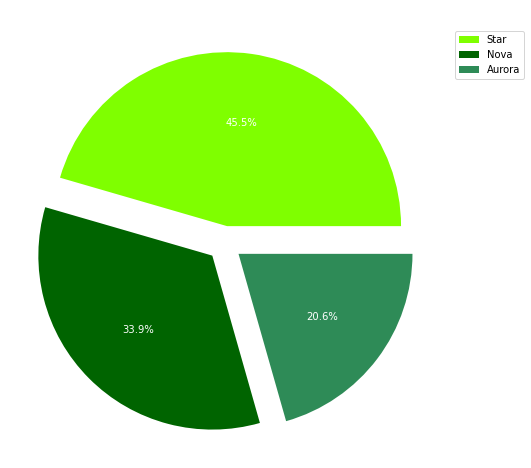

In [43]:
colors = ["chartreuse", "darkgreen", "seagreen"]

explode = (0.1,0.1, 0.1) 

plt.figure(figsize=(8,8))
plt.pie(proporcion, labels=proporcion.index, autopct='%1.1f%%',colors = colors, explode = explode,textprops={"color": "white"})
plt.title("Porcentaje clientes según tarjeta de fidelidad", color = "white", fontsize = 16, fontweight = "bold") 
plt.legend(bbox_to_anchor=(1.2, 1)) 
plt.show();

In [44]:
# 6. ¿Cómo se distribuyen los clientes según su estado civil y género? gender - marital_status

gender_marital = df_total2.groupby(["gender", "marital_status"]).size().reset_index(name="total")
gender_marital

,gender,marital_status,total
0,Female,Divorced,30634
1,Female,Married,117363
2,Female,Single,54760
3,Male,Divorced,30128
4,Male,Married,117482
5,Male,Single,53393


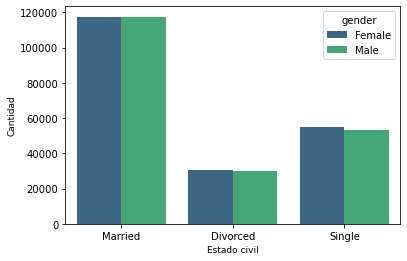

In [45]:
sns.countplot(x = "marital_status", 
              data = df_total2, 
              palette = "viridis", 
              hue = "gender")

plt.xlabel("Estado civil", fontsize = 9)
plt.ylabel("Cantidad",  fontsize = 9); 

### Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

##### 1. Preparación de Datos:
Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.

In [46]:
df_filtered = df_total2[["flights_booked", "education"]]
df_filtered.head()

,flights_booked,education
0,0,Bachelor
1,3,Bachelor
2,0,Bachelor
3,0,Bachelor
4,6,Bachelor


#### 2. Análisis Descriptivo:
Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estandar, los percentiles) del
número de vuelos reservados para cada grupo.

In [47]:
stadistics = df_filtered.groupby("education")["flights_booked"].describe()
display(stadistics)

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
Bachelor,252567.00,4.11,5.22,0.00,0.00,1.00,8.00,21.00
College,102260.00,4.17,5.25,0.00,0.00,1.00,8.00,21.00
Doctor,17731.00,4.18,5.26,0.00,0.00,1.00,8.00,21.00
High School or Below,18915.00,4.18,5.24,0.00,0.00,1.00,8.00,21.00
Master,12287.00,4.20,5.21,0.00,0.00,1.00,8.00,21.00


#### 3. Prueba Estadística:
Realiza una prueba de A/B testing para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes
niveles educativos.

In [48]:
# Anova 
anova = f_oneway(df_filtered[df_filtered["education"] == "Bachelor"]["flights_booked"],
                            df_filtered[df_filtered["education"] == "College"]["flights_booked"],
                            df_filtered[df_filtered["education"] == "Doctor"]["flights_booked"],
                            df_filtered[df_filtered["education"] == "Master"]["flights_booked"],
                            df_filtered[df_filtered["education"] == "High School or Below"]["flights_booked"])

# Imprimir resultados
print("Estadístico F:", anova.statistic)
print("Valor p:", anova.pvalue)

# Interpretar los resultados
alpha = 0.05
if anova.pvalue < alpha:
    print("Hay diferencias significativas en los vuelos registrados según el nivel educativo.")
    print("\n ---------- \n")
    

else:
    print("No hay evidencia de diferencias significativas en los vuelos reservados según el nivel educativo.")
    print("\n ---------- \n")
    

Estadístico F: 3.578957738498352
Valor p: 0.00635298173601954
Hay diferencias significativas en los vuelos registrados según el nivel educativo.

 ---------- 



**Interpretación:**

- Si `p_value < 0.05`: Rechazamos la hipótesis nula. Hay diferencias significativas en los vuelos registrados según el nivel educativo.

- Si `p_value >= 0.05`: No hay evidencia suficiente para rechazar la hipótesis nula. No hay evidencia de diferencias significativas en los vuelos reservados según el nivel educativo.

In [49]:
df3= df_filtered.groupby("education")["flights_booked"].mean().reset_index()
df3

,education,flights_booked
0,Bachelor,4.11
1,College,4.17
2,Doctor,4.18
3,High School or Below,4.18
4,Master,4.20


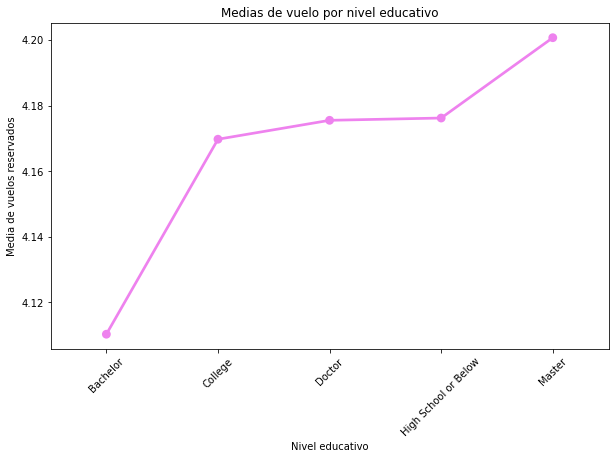

In [50]:
plt.figure(figsize=(10, 6))
sns.pointplot(x="education", y="flights_booked", data=df3, color="violet")
plt.title("Medias de vuelo por nivel educativo")
plt.xlabel("Nivel educativo")
plt.ylabel("Media de vuelos reservados")
plt.xticks(rotation=45) 
plt.show()

##### Interpretación final 

- **Selección prueba Anova**: Nos encontramos ante un ejercicio donde debemos comparar una variable categórica y una variable numérica. Al no ser posible determinar si una variable categórica sigue una distribución normal o no, he optado por analizarlo mediante el test Anova ya que permite el análisis que buscamos asumiendo homogeneidad en el grupo. 


- **Resultados**: para saber si existe una diferencia significativa en los vuelos registrados según el nivel educativo debemos fijarnos en el p.valor. Al ser éste mayor a 0.05 rechazamos H1 por lo que aceptamos H0, es decir, asumimos que sí existe una diferencia estadisticamente significativa.


- **Gráfica**: representación de las medias de vuelos registrados según nivel educativo. 
